Costomer Churn Prediction Using ANN (Artificial Neural Network)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

2023-05-28 16:27:48.472669: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df=pd.read_csv('customer_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

There are some empty values of Totalcharges

In [5]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Let's remove them

In [6]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

Histogram of customers who have/have not left the company

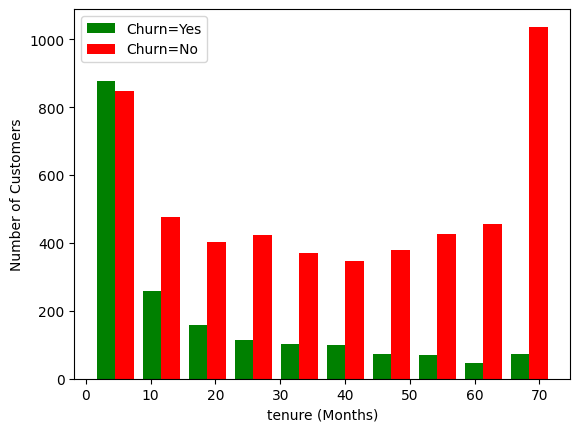

In [9]:
plt.hist([ df.tenure[df.Churn=='Yes'],df.tenure[df.Churn=='No']], color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel('tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend()

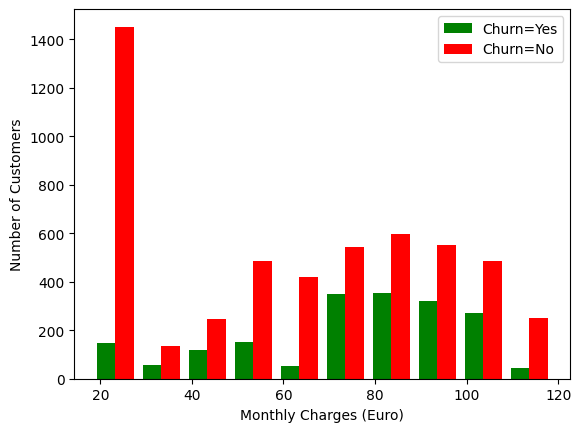

In [10]:
plt.hist([ df.MonthlyCharges[df.Churn=='Yes'],df.MonthlyCharges[df.Churn=='No']], color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel('Monthly Charges (Euro)')
plt.ylabel('Number of Customers')
plt.legend()

In total as it is seen below, this company have problem as many customers have left the company

In [11]:
df.Churn.value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Let's look at all columns contents

In [12]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [13]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)
df['gender'].replace({'Female':1,'Male':0},inplace=True)


In [14]:
df1 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

Scale data (after spliting)

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X=df1.drop('Churn', axis='columns')
y=df1['Churn']


In [17]:
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42, stratify=y)

In [18]:

scaler=MinMaxScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [19]:
X_train.shape

(5625, 26)

Let's start modeling without resampling

In [20]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout
from tensorflow.keras import regularizers


def ANN(X_train, y_train,X_test,y_test,loss,weights):
    model = Sequential()
    model.add(Dense(26, input_shape=(26,), activation='relu',kernel_regularizer=regularizers.l2(0.005)))
    #model.add(LeakyReLU(alpha=0.25))
    #model.add(Dropout(rate = 0.2))


    model.add(Dense(1, activation='sigmoid'))



    # opt = keras.optimizers.Adam(learning_rate=0.01)
    opt=tf.keras.optimizers.SGD(
        learning_rate=0.005,
        momentum=0.0,
        nesterov=False,
        weight_decay=None,
        clipnorm=None,
        clipvalue=None,
        global_clipnorm=None,
        use_ema=False,
        ema_momentum=0.79,
        ema_overwrite_frequency=None,
        jit_compile=True,
    )
    model.compile(optimizer=opt,
                loss=loss,
                metrics=['accuracy'])
    X_train=np.asarray(X_train).astype('float32')
    X_test=np.asarray(X_test).astype('float32')
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

    # Retrieve the training loss and validation loss from the history object
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    training_accuracy=history.history['accuracy']
    validation_accuracy=history.history['val_accuracy']
    print('model evaluation: ', model.evaluate(X_test,y_test))
    return y_pred, training_loss, validation_loss, training_accuracy, validation_accuracy


In [21]:
y_pred, training_loss, validation_loss, training_accuracy, validation_accuracy=ANN(X_train, y_train,X_test,y_test,'binary_crossentropy',weights=-1)


Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.7912 - accuracy: 0.6517
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.7242 - accuracy: 0.7349
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.7346
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.7415
Epoch 5/100
176/176 [==============================] - 0s 899us/step - loss: 0.6360 - accuracy: 0.7504
Epoch 6/100
176/176 [==============================] - 0s 913us/step - loss: 0.6152 - accuracy: 0.7586
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5979 - accuracy: 0.7717
Epoch 8/100
176/176 [==============================] - 0s 922us/step - loss: 0.5840 - accuracy: 0.7794
Epoch 9/100
176/176 [==============================] - 0s 878us/step - loss: 0.5729 - accuracy: 0.7845
Epoch 10/100
176/176 [==============================] - 0s 847us/step - loss: 0.564

In [22]:
y_pred[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [23]:
y_test[:10]

974     0
619     0
4289    0
3721    1
4533    0
445     1
5898    0
3387    0
1346    1
5690    0
Name: Churn, dtype: int64

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

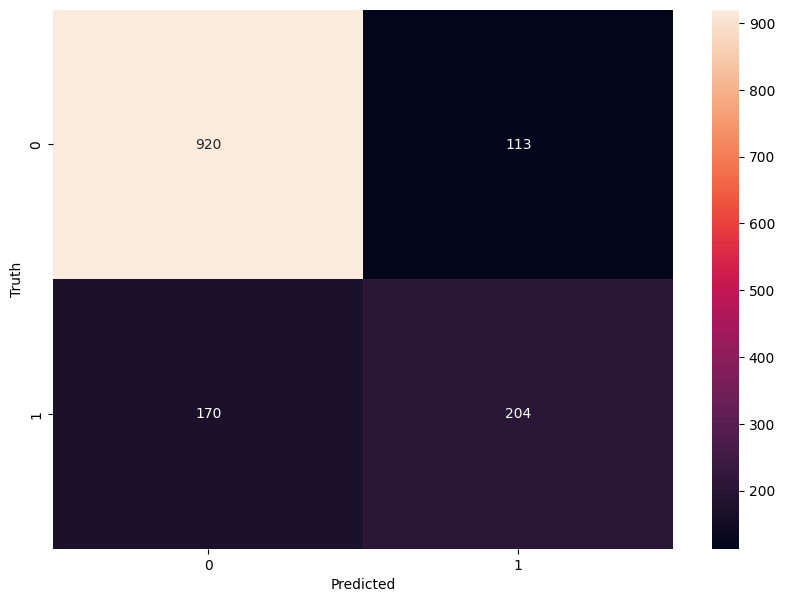

In [25]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

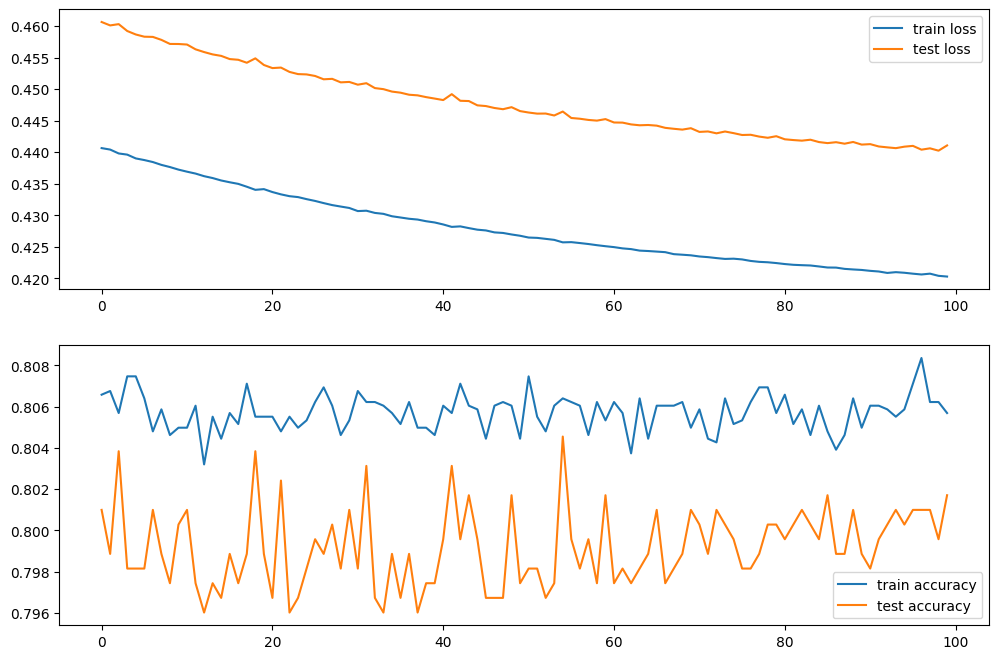

In [26]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(training_loss, label='train loss')
ax1.plot(validation_loss, label='test loss')

ax2.plot(training_accuracy, label='train accuracy')
ax2.plot(validation_accuracy, label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

**Undersampling**

In [27]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [28]:
y_test.value_counts()

Churn
0    1033
1     374
Name: count, dtype: int64

In [29]:
df1.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [30]:
count_class_0,count_class_1= df1.Churn.value_counts()

In [31]:
df1_under_0=df1[df1.Churn==0].sample(count_class_1)# sample only count_class_1 sample points from majority class 
df1_samp=pd.concat([df1_under_0, df1[df1.Churn==1]], axis=0) 

In [32]:
df1_samp.Churn.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [33]:
X=df1_samp.drop('Churn', axis='columns')
y=df1_samp['Churn']


In [34]:
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42, stratify=y)

In [35]:
scaler=MinMaxScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [36]:
y_pred, training_loss, validation_loss, training_accuracy, validation_accuracy=ANN(X_train, y_train,X_test,y_test,'binary_crossentropy',weights=-1)



Epoch 1/100
94/94 [==============================] - 0s 916us/step - loss: 0.7737 - accuracy: 0.6318
Epoch 2/100
94/94 [==============================] - 0s 871us/step - loss: 0.7460 - accuracy: 0.6957
Epoch 3/100
94/94 [==============================] - 0s 876us/step - loss: 0.7243 - accuracy: 0.7224
Epoch 4/100
94/94 [==============================] - 0s 864us/step - loss: 0.7064 - accuracy: 0.7358
Epoch 5/100
94/94 [==============================] - 0s 851us/step - loss: 0.6918 - accuracy: 0.7391
Epoch 6/100
94/94 [==============================] - 0s 902us/step - loss: 0.6798 - accuracy: 0.7452
Epoch 7/100
94/94 [==============================] - 0s 993us/step - loss: 0.6698 - accuracy: 0.7458
Epoch 8/100
94/94 [==============================] - 0s 843us/step - loss: 0.6614 - accuracy: 0.7475
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7522
Epoch 10/100
94/94 [==============================] - 0s 855us/step - loss: 0.6483 - accuracy

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       374
           1       0.76      0.74      0.75       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



Text(95.72222222222221, 0.5, 'Truth')

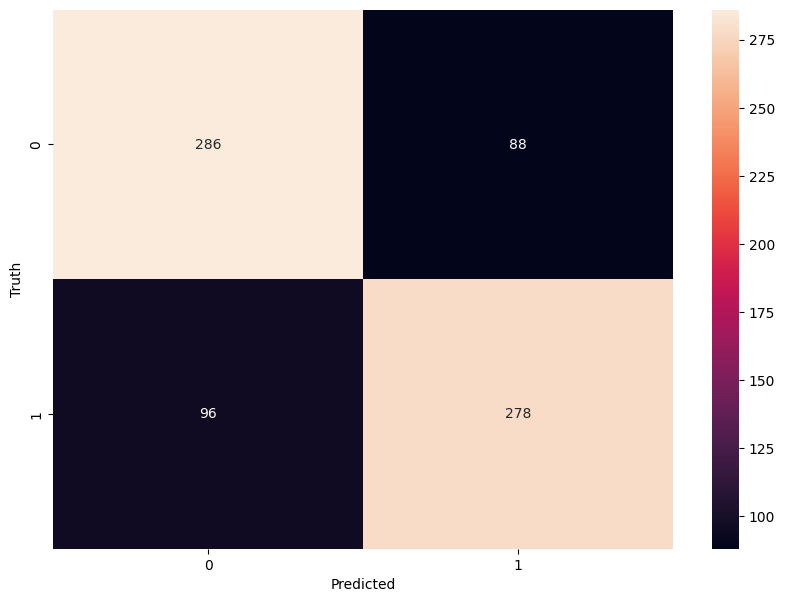

In [38]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

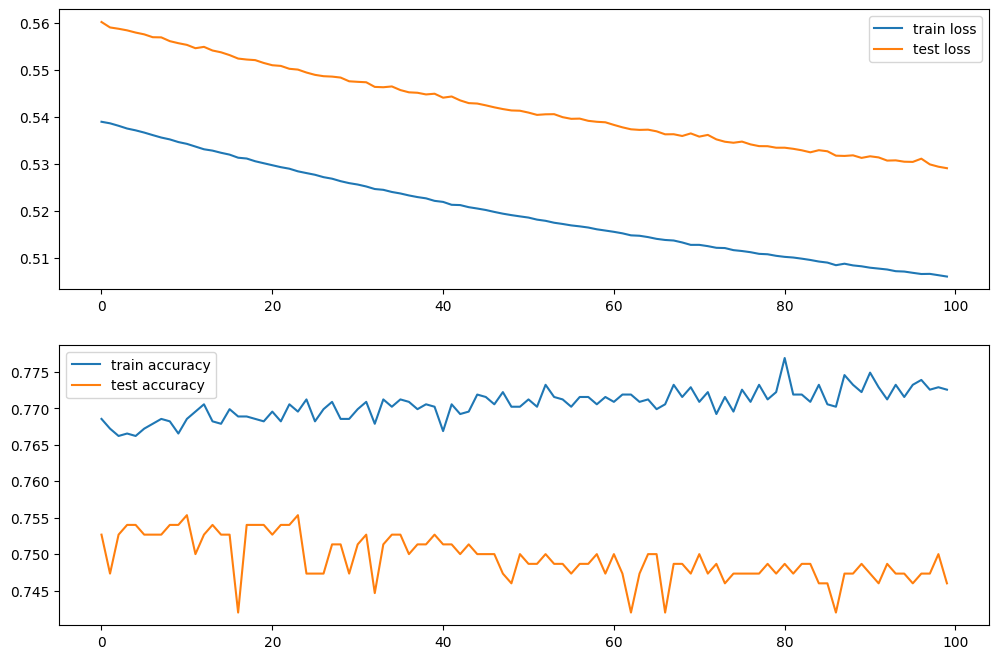

In [40]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(training_loss, label='train loss')
ax1.plot(validation_loss, label='test loss')

ax2.plot(training_accuracy, label='train accuracy')
ax2.plot(validation_accuracy, label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

**Oversampling**

In [42]:
df1_over_1=df1[df1.Churn==1].sample(count_class_0, replace=True)# sample count_class_0 sample points from minory class 
df1_samp=pd.concat([df1_over_1, df1[df1.Churn==0]], axis=0) 

In [43]:
X=df1_samp.drop('Churn', axis='columns')
y=df1_samp['Churn']
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42, stratify=y)
scaler=MinMaxScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
y_pred, training_loss, validation_loss, training_accuracy, validation_accuracy=ANN(X_train, y_train,X_test,y_test,'binary_crossentropy',weights=-1)


Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.8062 - accuracy: 0.5729
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.7325 - accuracy: 0.7102
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.7356
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.7425
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7471
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.7464
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7499
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.7528
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.7530
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6087 - accura

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1033
           1       0.74      0.79      0.76      1033

    accuracy                           0.75      2066
   macro avg       0.76      0.75      0.75      2066
weighted avg       0.76      0.75      0.75      2066



Text(95.72222222222221, 0.5, 'Truth')

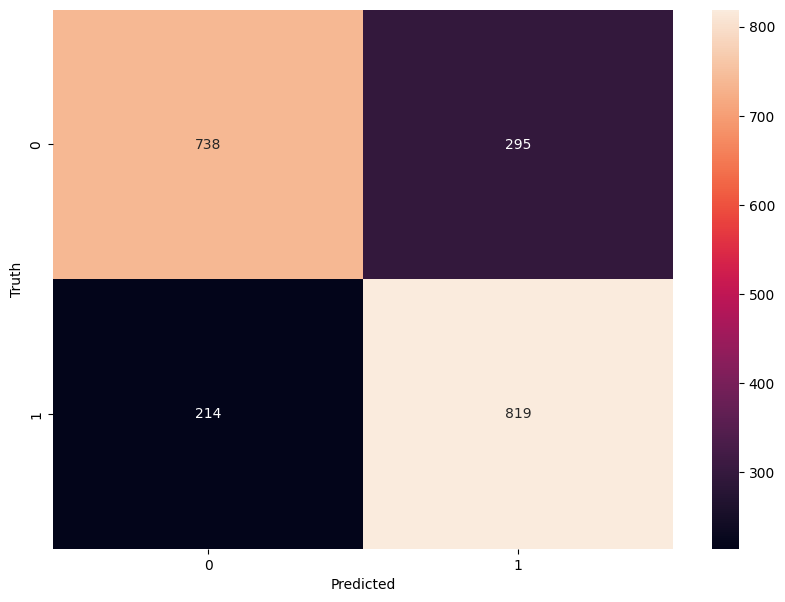

In [45]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

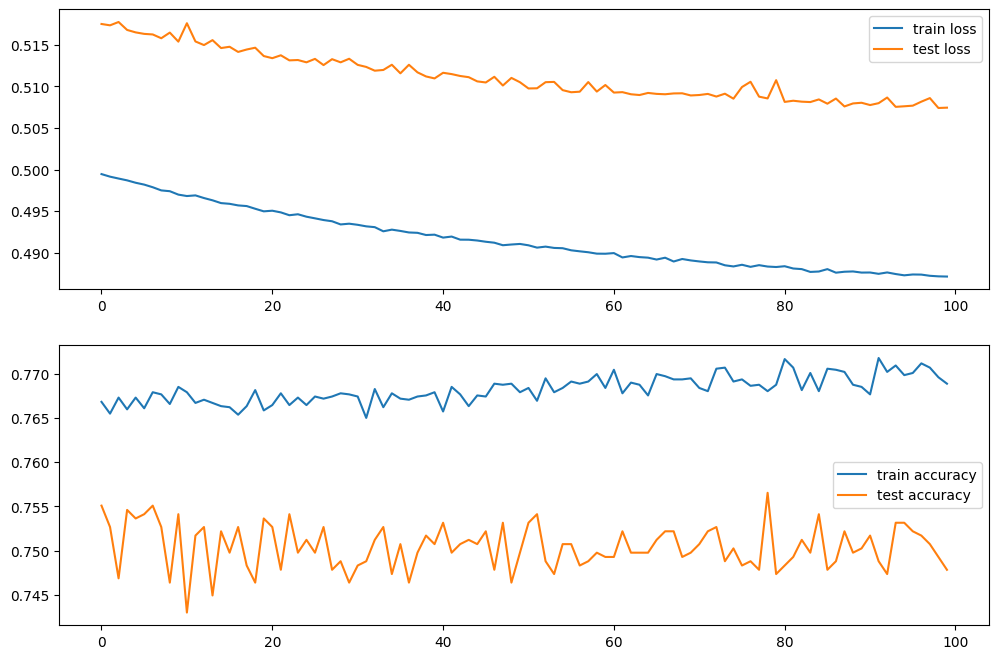

In [46]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(training_loss, label='train loss')
ax1.plot(validation_loss, label='test loss')

ax2.plot(training_accuracy, label='train accuracy')
ax2.plot(validation_accuracy, label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

**SMOTE**

In [54]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [60]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote, y_smote=smote.fit_resample(X, y)
y_smote.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [66]:
X_train, X_test,y_train,y_test=train_test_split(x_smote,y_smote, test_size=0.2,random_state=42, stratify=y_smote)


In [67]:
scaler=MinMaxScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
y_pred, training_loss, validation_loss, training_accuracy, validation_accuracy=ANN(X_train, y_train,X_test,y_test,'binary_crossentropy',weights=-1)


Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.7729 - accuracy: 0.6224
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.7042 - accuracy: 0.7157
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.7562
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7787
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.7913
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7978
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.8018
Epoch 8/100
259/259 [==============================] - 0s 951us/step - loss: 0.5473 - accuracy: 0.8046
Epoch 9/100
259/259 [==============================] - 0s 954us/step - loss: 0.5379 - accuracy: 0.8070
Epoch 10/100
259/259 [==============================] - 0s 952us/step - loss: 0.5297 - 

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1033
           1       0.83      0.84      0.84      1033

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



Text(95.72222222222221, 0.5, 'Truth')

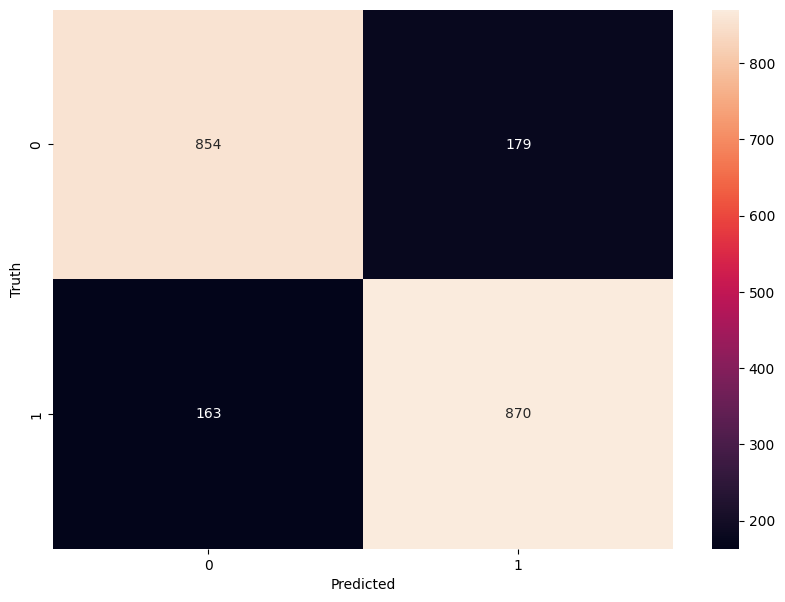

In [69]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

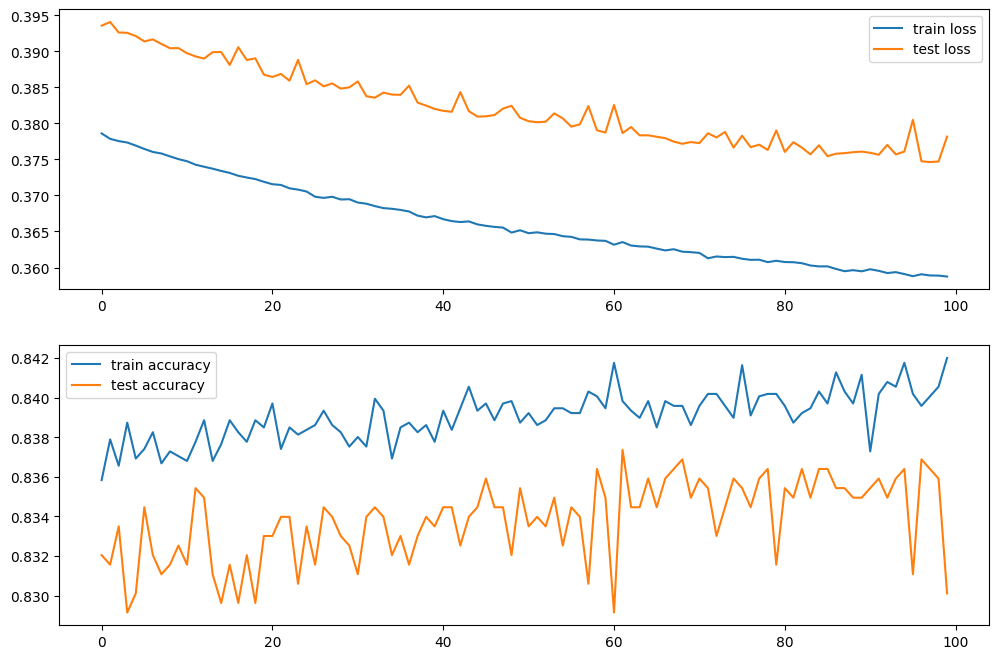

In [70]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(training_loss, label='train loss')
ax1.plot(validation_loss, label='test loss')

ax2.plot(training_accuracy, label='train accuracy')
ax2.plot(validation_accuracy, label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

**ensemble**

In [71]:
df1.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [74]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42, stratify=y)
scaler=MinMaxScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])


We have to find the ratio between majority and minority classes so that to find how many batches we need

In [77]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [79]:
y_train.value_counts()[0]/y_train.value_counts()[1]

2.762541806020067

It means that we need to devide the mejor class dataset into 3 batches 

In [80]:
y_train.value_counts()[0]/3

1376.6666666666667

Let's define a new dataset from X_train and create batches

In [81]:
df2=X_train.copy()
df2['Churn']=y_train
df2_class0=df2[df2.Churn==0]
df2_class1=df2[df2.Churn==1]

In [83]:
df2_class0.shape,df2_class1.shape

((4130, 27), (1495, 27))

class 0 is the mejority class

Write a function for creating batches out of majority class

In [101]:
def get_batches(df_maj, df_min, start, end):
    df_t=pd.concat([df_maj[start:end], df_min], axis=0)
    return df_t

Create the first batch (the first 1495 data points of df2_class0- 1495 is the number of data of df2_class1)

In [105]:
df3=get_batches(df2_class0, df2_class1, 0, df2_class1.shape[0])
X_train=df3.drop('Churn', axis=1)
y_train=df3['Churn']


In [106]:
y_pred1, training_loss1, validation_loss1, training_accuracy1, validation_accuracy1=ANN(X_train, y_train,X_test,y_test,'binary_crossentropy',weights=-1)


Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.8003 - accuracy: 0.5809
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7694 - accuracy: 0.6321
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7448 - accuracy: 0.6766
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.6983
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7068 - accuracy: 0.7107
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.7227
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.7284
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.7328
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.7368
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7398
Epoch 11/

In [107]:
df3=get_batches(df2_class0, df2_class1, df2_class1.shape[0], 2*df2_class1.shape[0])
X_train=df3.drop('Churn', axis=1)
y_train=df3['Churn']

In [108]:
y_pred2, training_loss2, validation_loss2, training_accuracy2, validation_accuracy2=ANN(X_train, y_train,X_test,y_test,'binary_crossentropy',weights=-1)


Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7967 - accuracy: 0.5585
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7642 - accuracy: 0.6488
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7422 - accuracy: 0.6926
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7243 - accuracy: 0.7184
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7087 - accuracy: 0.7314
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.7385
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.7505
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.7542
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.7552
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.7602
Epoch 11/

In [109]:
df3=get_batches(df2_class0, df2_class1, 2*df2_class1.shape[0], 3*df2_class1.shape[0])
X_train=df3.drop('Churn', axis=1)
y_train=df3['Churn']

In [110]:
y_pred3, training_loss3, validation_loss3, training_accuracy3, validation_accuracy3=ANN(X_train, y_train,X_test,y_test,'binary_crossentropy',weights=-1)


Epoch 1/100
83/83 [==============================] - 0s 1ms/step - loss: 0.7974 - accuracy: 0.6027
Epoch 2/100
83/83 [==============================] - 0s 1000us/step - loss: 0.7545 - accuracy: 0.6865
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.7352 - accuracy: 0.7047
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.7202 - accuracy: 0.7226
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.7068 - accuracy: 0.7359
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.7423
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.7454
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.7457
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.7529
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.7518
Epoch 

get the majority vote

In [111]:
y_pred_final = y_pred1.copy()
# Wehave three votes, if sum is 1 then majority is zero otherwise the majority is one
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [112]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407



Text(95.72222222222221, 0.5, 'Truth')

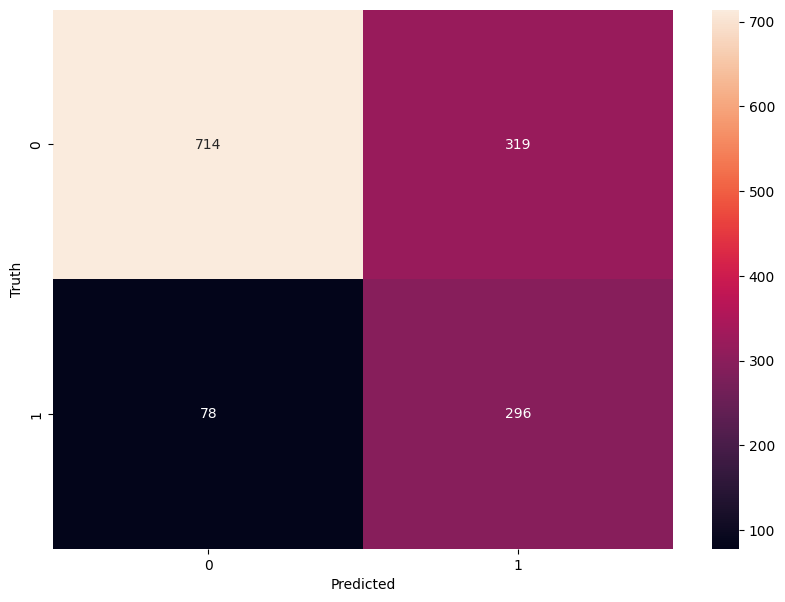

In [114]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_final)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

The above results show that SMOTE perfomes the best among the four methods of resampling